# Using the machine learning algorithm: Decision Tree, and the S1_Originaldata.csv database with cells into neoplastic astrocytes from the periphery, i.e., infiltrating neoplastic cells, and the tumor core, evaluate the performance of the classification with:
a) Parameter optimization
b) Discuss the results obtained (different metrics) 


In [165]:
from time import time

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import seaborn as sns; sns.set() 
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import re
from numpy import random
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [166]:
    def show_confusion_matrix(model, x_test, y_test):
    class_names = model.classes_
    fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
    ax.grid = False
    plt.rcParams.update({'font.size': 8})
    disp = plot_confusion_matrix(model, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 ax=ax)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, ha='right')
    disp.ax_.set_title(f'Confusion Matrix\n{model}', size=11, y=1.05)
    ax.tick_params(axis='both', which='major', labelsize=10)
    plt.show();
                              


IndentationError: expected an indented block (1339068220.py, line 2)

In [167]:
import numpy as np
import pandas as pd
from time import time

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set() 

import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import re
from numpy import random
import seaborn as sb
import matplotlib.pyplot as plt

rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)

set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = 'S1_Originaldata.csv'
df = pd.read_csv(filename)
df.describe

<bound method NDFrame.describe of                     class  1/2-SBSRNA4  A1BG  A1BG-AS1  A1CF  A2LD1  \
0         Neoplastic_Core          0.0   0.0       0.0   0.0    0.0   
1         Neoplastic_Core          0.0   0.0       0.0   0.0    0.0   
2         Neoplastic_Core          0.0   0.0       0.0   0.0    0.0   
3         Neoplastic_Core          0.0   0.0       0.0   0.0    0.0   
4         Neoplastic_Core          0.0   0.0       0.0   0.0    0.0   
..                    ...          ...   ...       ...   ...    ...   
439  Neoplastic_Periphery          0.0   0.0       0.0   0.0    0.0   
440  Neoplastic_Periphery          0.0   0.0       0.0   0.0    0.0   
441  Neoplastic_Periphery          0.0   0.0       0.0   0.0    0.0   
442  Neoplastic_Periphery          0.0   0.0       0.0   0.0    0.0   
443  Neoplastic_Periphery          0.0   0.0       0.0   0.0    0.0   

           A2M     A2ML1  A2MP1  A4GALT  ...  PPP1R2P3  PPP1R2P9  PPP1R32  \
0     0.000000  0.000000    0.0     

Rows, Columns: (444, 16384)


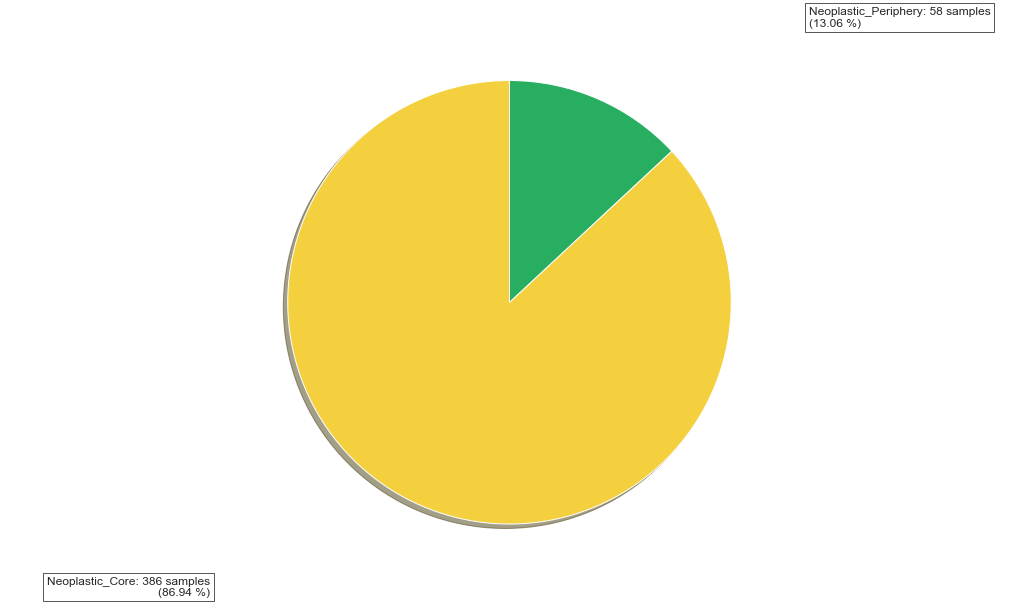

In [168]:
print("Rows, Columns:",df.shape)
classes = df.groupby('class').size()
labels = classes.index.values
sizes = classes.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' samples\n({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

In [169]:
tree = DecisionTreeClassifier() # decision tree algorithm
tree.fit(X_imn_train, y_imn_train)

       1/2-SBSRNA4        A1BG    A1BG-AS1        A1CF       A2LD1  \
count   444.000000  444.000000  444.000000  444.000000  444.000000   
mean      0.281286    1.300646    0.218221    0.043053    0.169951   
std       1.448833    2.474125    1.103586    0.567969    1.023480   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.000000    0.000000    0.000000    0.000000    0.000000   
50%       0.000000    0.000000    0.000000    0.000000    0.000000   
75%       0.000000    0.000000    0.000000    0.000000    0.000000   
max       9.515390    9.235368    8.587576    8.715006    9.315997   

              A2M       A2ML1       A2MP1  A4GALT       A4GNT  ...  \
count  444.000000  444.000000  444.000000   444.0  444.000000  ...   
mean     0.966699    0.308724    0.034910     0.0    0.019368  ...   
std      2.856530    1.524655    0.468207     0.0    0.342199  ...   
min      0.000000    0.000000    0.000000     0.0    0.000000  ...   
25%      0.000000  

In [170]:
data = df
classes = pd.get_dummies(df['class'])
data['class'] = classes.values.argmax(1)

In [171]:
#Counts of classes in data
df['class'].value_counts()

0    386
1     58
Name: class, dtype: int64

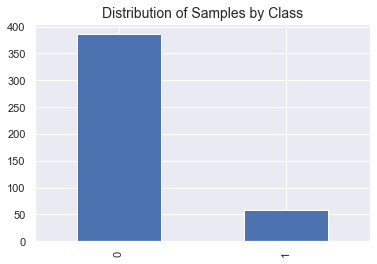

In [172]:
df['class'].value_counts().plot(kind='bar', title='Distribution of Samples by Class');

In [173]:
features = df_upsampled.columns[:16383] 
X = df_upsampled[features].values
labels = df.columns[-1]
y = df_upsampled[labels].values


In [174]:
print(f'Feature Columns: {", ".join(features)}\nLabel Column: {labels}')

Feature Columns: class, 1/2-SBSRNA4, A1BG, A1BG-AS1, A1CF, A2LD1, A2M, A2ML1, A2MP1, A4GALT, A4GNT, AA06, AAA1, AAAS, AACS, AACSP1, AADAC, AADACL2, AADACL3, AADACL4, AADAT, AAGAB, AAK1, AAMP, AANAT, AARS, AARS2, AARSD1, AASDH, AASDHPPT, AASS, AATF, AATK, AATK-AS1, ABAT, ABCA1, ABCA10, ABCA11P, ABCA12, ABCA13, ABCA17P, ABCA2, ABCA3, ABCA4, ABCA5, ABCA6, ABCA7, ABCA8, ABCA9, ABCB1, ABCB10, ABCB11, ABCB4, ABCB5, ABCB6, ABCB7, ABCB8, ABCB9, ABCC1, ABCC10, ABCC11, ABCC12, ABCC13, ABCC2, ABCC3, ABCC4, ABCC5, ABCC6, ABCC6P1, ABCC6P2, ABCC8, ABCC9, ABCD1, ABCD2, ABCD3, ABCD4, ABCE1, ABCF1, ABCF2, ABCF3, ABCG1, ABCG2, ABCG4, ABCG5, ABCG8, ABHD1, ABHD10, ABHD11, ABHD11-AS1, ABHD12, ABHD12B, ABHD13, ABHD14A, ABHD14A-ACY1, ABHD14B, ABHD15, ABHD16A, ABHD16B, ABHD2, ABHD3, ABHD4, ABHD5, ABHD6, ABHD8, ABI1, ABI2, ABI3, ABI3BP, ABL1, ABL2, ABLIM1, ABLIM2, ABLIM3, ABO, ABP1, ABR, ABRA, ABT1, ABTB1, ABTB2, ACAA1, ACAA2, ACACA, ACACB, ACAD10, ACAD11, ACAD8, ACAD9, ACADL, ACADM, ACADS, ACADSB, ACADVL, ACA

In [176]:
x = df.drop(['class'], axis=1)
y = df['class']

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [151]:
tree = DecisionTreeClassifier() # decision tree algorithm
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [152]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.') 
print(f'Model Accuracy: {tree.score(x_train, y_train)}')

Decision tree has 15 nodes with maximum depth 5.
Model Accuracy: 1.0


In [183]:
dt = DecisionTreeClassifier(random_state=0, max_depth = 13)
dt.fit(x_train,y_train)

print('acc for training data: {:.3f}'.format(dt.score(x_train,y_train)))
print('acc for test data: {:.3f}'.format(dt.score(x_test,y_test)))

acc for training data: 1.000
acc for test data: 0.892


In [178]:
y_pred = tree.predict(x_test) 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        91
           1       0.83      0.50      0.62        20

    accuracy                           0.89       111
   macro avg       0.87      0.74      0.78       111
weighted avg       0.89      0.89      0.88       111



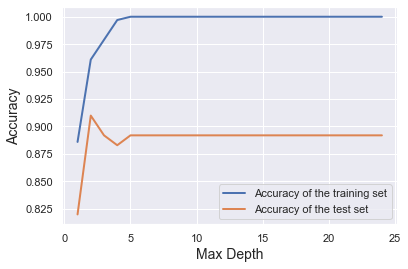

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np
#import graphviz
%matplotlib inline
neighbors_setting = range(1,25)


y = df['class'].values
x = df.drop(['class'], axis=1)

#----------------- Decision Tree
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

training_accuracy = []
test_accuracy = []

max_dep = range(1,25)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(x_train,y_train)
    training_accuracy.append(tree.score(x_train, y_train))
    test_accuracy.append(tree.score(x_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()



Here, from the visualizing the unseen data of decision tree we see that the accuracy for the given data is 89% perfect which is very high. This prediction is before optimizing the data, now next we will optimize the data and check the result.

# Decision Tree (Optimization)

In [184]:
param_grid = { 'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [2, 20, 50,70], 
               'max_leaf_nodes': [5, 9, 15, 21, 27]}
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gs_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_leaf_nodes': [5, 9, 15, 21, 27],
                         'min_samples_leaf': [2, 20, 50, 70]})

In [185]:
print(f'The best model is: \n{gs_dt.best_estimator_}')

The best model is: 
DecisionTreeClassifier(max_depth=4, max_leaf_nodes=21, min_samples_leaf=2)


In [186]:
tree_opt = gs_dt.best_estimator_
print(f'Decision tree has {tree_opt.tree_.node_count} nodes with maximum depth {tree_opt.tree_.max_depth}.') 
print(f'Model Accuracy: {tree_opt.score(x_train, y_train)}')

Decision tree has 13 nodes with maximum depth 4.
Model Accuracy: 0.996996996996997


In [187]:
y_pred = tree_opt.predict(x_test) 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        91
           1       0.86      0.60      0.71        20

    accuracy                           0.91       111
   macro avg       0.89      0.79      0.83       111
weighted avg       0.91      0.91      0.90       111



Here, from the visualizing the unseen data of decision tree we see that the accuracy for the given data is 91% perfect which is very high. precision, recall, f1-score is also incresed.